# Pycaret Notebook Model - Titanic Survival Prediction
## Introduction on making a model with Pycaret
The task at hand is to use PyCaret to make a model that predicts whether a passenger on the Titanic would survive or not.

## Step 1: Import the necessary libraries

In [1]:
#import titanic dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd

###  Step 2: Exploring the data
The first step is to explore the data and see what we are working with. The data is stored in a excele file and has been read into a pandas dataframe. The firt 10 row of the data has been displayed above.

Now you need the shape of the data to see how many rows and columns are there in the data.

In [2]:
#import this file files/titanic3.xls into a dataframe
titanic = pd.read_excel('../files/titanic3.xls')
titanic.head()  

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
titanic.shape

(1309, 14)

You will now get a list of the columns.

In [4]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

We can see it has 13 features and 1 target variable. The target variable is the Survived column. The features are the rest of the columns.

Next lets check the data types of the columns.

In [5]:
titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

Now lets check for any missing values in the data.

Check for missing values in every feature column

In [6]:
#check for missing values
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

* There are 263 missing values in the Age column.
* There are 1 missing values in the Fare column.
* There are 1014 missing values in the Cabin column.
* There are 2 missing values in the Embarked column.
* There are 823 missing values in the Boat column.
* There are 1188 missing values in the Body column.
* There are 564 missing values in the home.dest column.
* There are 2 missing values in the embarked column.

Since the many columns have missing values, I would have to drop them all except a column where I can fill with the mean of the column. So columns like Cabin, Boat, Body, home.dest would be dropped.

To make this data more usable for machine we would have to drop features that are not useful for the model. So we would drop the name, ticket, cabin, boat, body, home.dest, embarked and sibsp.

The reason for dropping some columns are as follows:
* Name: The name of the passenger is not useful for the model as it does not have any impact on the survival of the passenger.
* Ticket: The ticket number is not useful for the model as it does not have any impact on the survival of the passenger.
* Cabin: The cabin number is not useful for the model as it does not have any impact on the survival of the passenger.
* Boat: The boat number is not useful for the model as it the passenger already surived if he was on a boat, this would make the model overfit.
* Body: The body although is useful for the model but since it has 1188 missing values, it would be better to drop it.
* Home.dest: The home destination of the passenger is not useful for the model as it does not have any impact on the survival of the passenger.

In [7]:
#delete features that are not useful
titanic.drop(['name','ticket','cabin','boat','body','home.dest','embarked','sibsp'], axis=1, inplace=True)
titanic.head()

,pclass,survived,sex,age,parch,fare
0,1,1,female,29.0000,0,211.3375
1,1,1,male,0.9167,2,151.5500
2,1,0,female,2.0000,2,151.5500
3,1,0,male,30.0000,2,151.5500
4,1,0,female,25.0000,2,151.5500


Now lets drop all rows with null values in the dataset and check the shape of the data.

In [8]:
#remove row with missing values 
titanic.dropna(inplace=True)
titanic.shape

(1045, 6)

To make the dataset usable by a ML algorithm we have to change the categorical features into numerical features. So we have to change the gender in from male to female to 0 and 1 respectively. Also we have to change the Embarked column to numerical values. So we have to change the values in the Embarked column to 0, 1 and 2 respectively.

In [9]:
titanic['sex'] = titanic['sex'].replace({'male': 1, 'female': 0})
titanic.shape

(1045, 6)

Lets have some insights on the data
Lets plot the survival of the sex 

<Axes: >

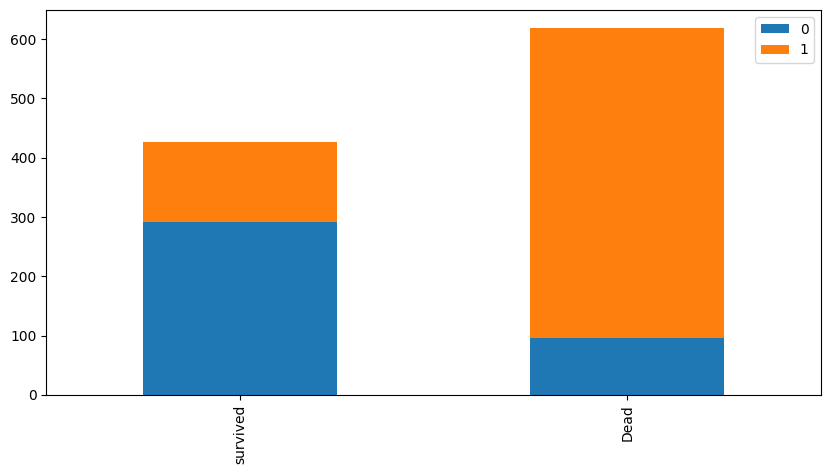

In [10]:

survived = titanic[titanic['survived']==1]["sex"].value_counts()
dead = titanic[titanic['survived']==0]["sex"].value_counts()
df_survived_dead = pd.DataFrame([survived,dead])
df_survived_dead.index = ['survived','Dead']
df_survived_dead.plot(kind='bar',stacked=True, figsize=(10,5))


Plot the survival based on the classes of the ticket

<Axes: >

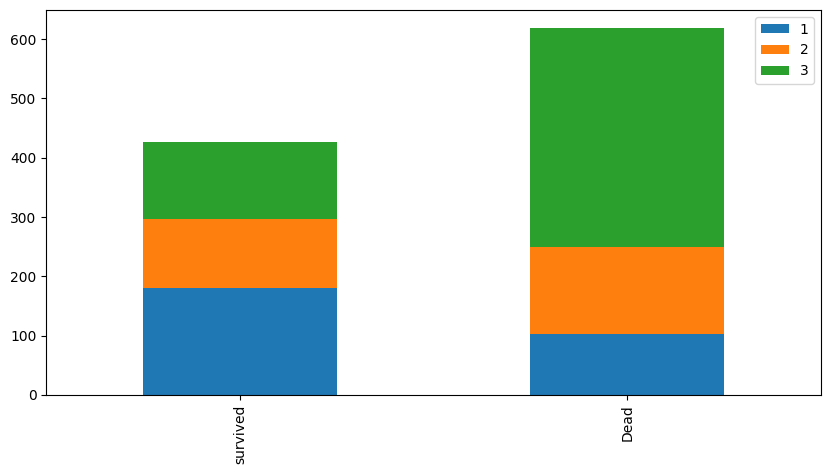

In [11]:
survived = titanic[titanic['survived']==1]["pclass"].value_counts().reindex([1, 2, 3])
dead = titanic[titanic['survived']==0]["pclass"].value_counts().reindex([1, 2, 3])
df_survived_dead = pd.DataFrame([survived,dead])
df_survived_dead.index = ['survived','Dead']
df_survived_dead.plot(kind='bar',stacked=True, figsize=(10,5))

Lets see whats left of the data now

In [12]:
titanic.head()

,pclass,survived,sex,age,parch,fare
0,1,1,0,29.0000,0,211.3375
1,1,1,1,0.9167,2,151.5500
2,1,0,0,2.0000,2,151.5500
3,1,0,1,30.0000,2,151.5500
4,1,0,0,25.0000,2,151.5500


 Now, we want to explore the relationships between the features and the target variable, 'survived'. To do this, we can calculate the correlation matrix between the features and the target variable. This will help us identify which features have a strong correlation with the target variable and can be used to build a predictive model. We will use the seaborn library to plot a heatmap of the correlation matrix.

 As we can there is no feature which has zero correlation with the target variable. So we can use all the features to build our model.

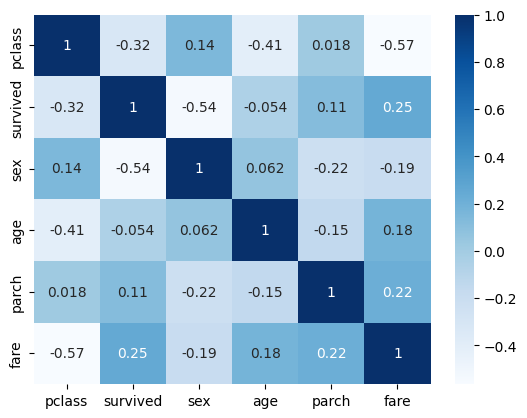

In [13]:
# Calculate the correlation matrix
corr = titanic.corr()
# Plot the heatmap
sns.heatmap(corr, annot=True, cmap="Blues")
plt.show()

Another easier way os to use a bar chart to visualize the correlation between the features and the target variable. We can use the plot function in seaborn to do this. Bar chart pointing downwards means negative correlation and bar chart pointing upwards means positive correlation.

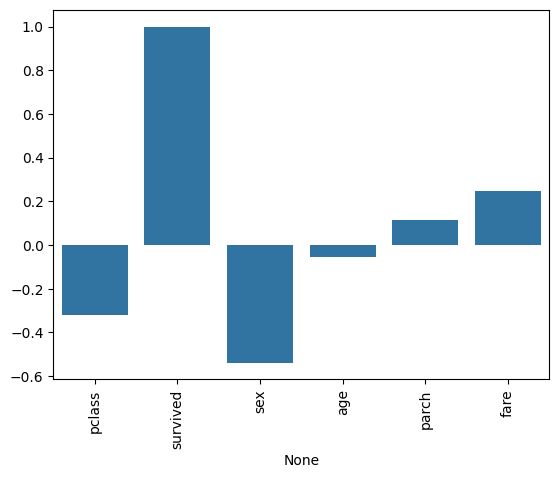

pclass     -0.319979
survived    1.000000
sex        -0.537719
age        -0.053958
parch       0.114091
fare        0.249164
dtype: float64


In [14]:
corr_matrix = titanic.corrwith(titanic['survived'])

sns.barplot(x=corr_matrix.index, y=corr_matrix.values)

plt.xticks(rotation=90)

plt.show()

print(corr_matrix)

Now lets check to find some outliers in the data. We can use the boxplot function in seaborn to do this. As we can see below thre are some outliers in fare, age and parch. The only way to find out if removing these outliers would thorw off my model was by training it and doing that reduced the accuracy of my model. So I decided to keep the outliers.

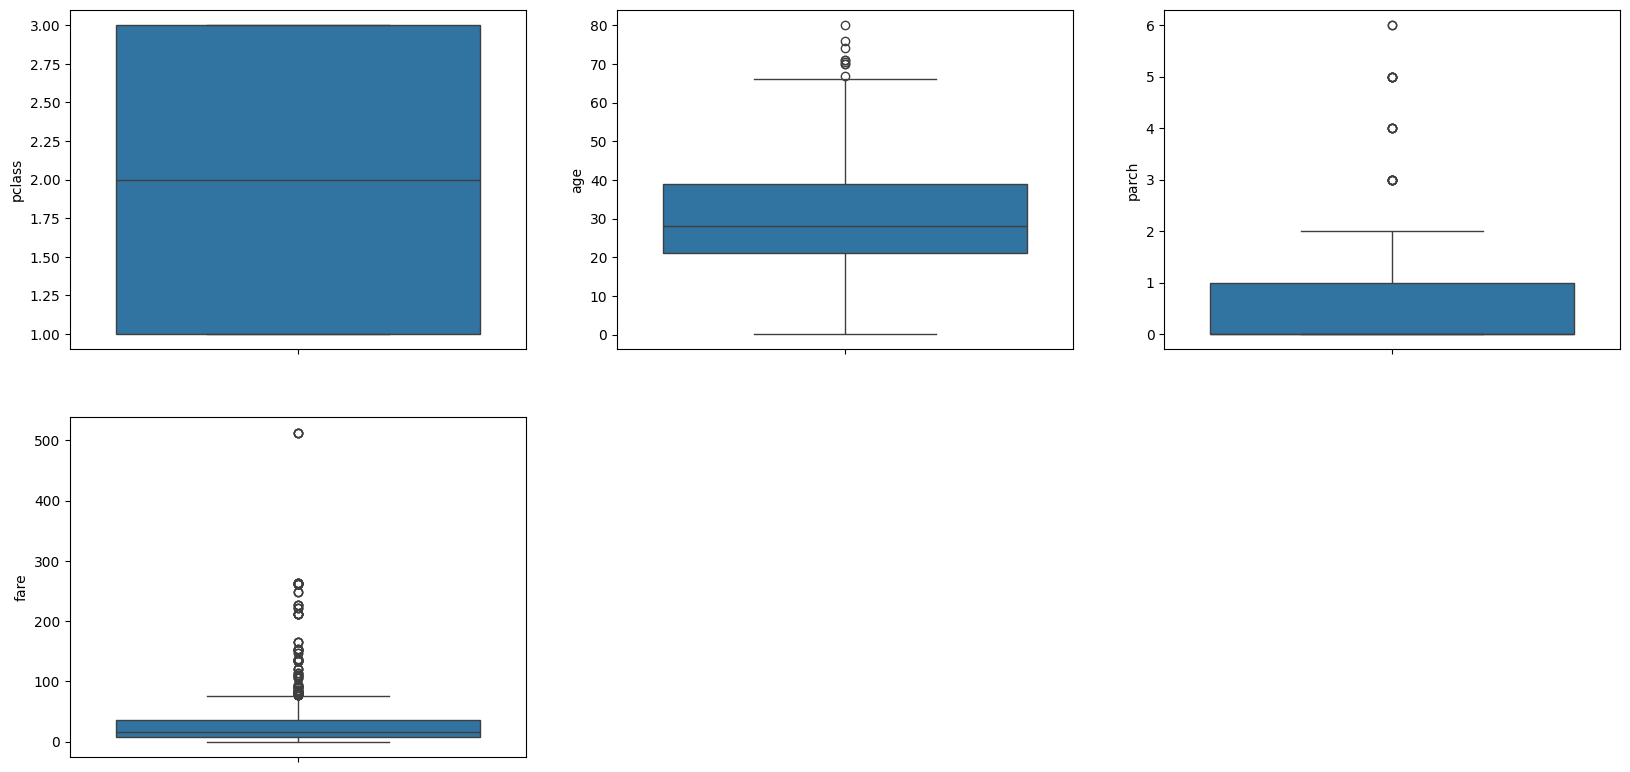

In [15]:
#plot a boxplot for all the features to see the outliers
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(titanic['pclass'])
plt.subplot(3,3,2)
sns.boxplot(titanic['age'])
plt.subplot(3,3,3)
sns.boxplot(titanic['parch'])
plt.subplot(3,3,4)
sns.boxplot(titanic['fare'])
plt.show()

## Step 3: Preparing the data for the model

Import pycaret classification module

In [16]:
#import pycaret
from pycaret.classification import *


In [17]:
s = setup(titanic, target = 'survived', session_id = 123)

,Description,Value
0,Session id,123
1,Target,survived
2,Target type,Binary
3,Original data shape,"(1045, 6)"
4,Transformed data shape,"(1045, 6)"
5,Transformed train set shape,"(731, 6)"
6,Transformed test set shape,"(314, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


Compare the perfomance of different models and store the best model in best

In [18]:
# functional API
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8235,0.8537,0.7593,0.8013,0.7780,0.6320,0.6343,0.0340
lightgbm,Light Gradient Boosting Machine,0.8194,0.8644,0.7390,0.8080,0.7695,0.6218,0.6260,0.2010
gbc,Gradient Boosting Classifier,0.8084,0.8687,0.6857,0.8204,0.7441,0.5935,0.6022,0.0150
et,Extra Trees Classifier,0.8003,0.8285,0.7423,0.7660,0.7522,0.5851,0.5872,0.0300
dt,Decision Tree Classifier,0.7934,0.7844,0.7360,0.7572,0.7442,0.5712,0.5737,0.0040
lda,Linear Discriminant Analysis,0.7934,0.8428,0.7026,0.7714,0.7344,0.5662,0.5688,0.0040
ridge,Ridge Classifier,0.7920,0.0000,0.6993,0.7707,0.7322,0.5631,0.5658,0.0040
lr,Logistic Regression,0.7879,0.8428,0.6926,0.7657,0.7259,0.5541,0.5572,0.2040
qda,Quadratic Discriminant Analysis,0.7838,0.8370,0.6755,0.7728,0.7193,0.5447,0.5494,0.0040
nb,Naive Bayes,0.7729,0.8213,0.7226,0.7245,0.7222,0.5304,0.5320,0.0040


In [19]:
print(best)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


In [20]:
# functional API
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [21]:
# Up to you!
predict_model(best, titanic.tail())

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8000,0,0.0000,0.0000,0.0000,0.0000,0.0000


,pclass,sex,age,parch,fare,survived,prediction_label,prediction_score
1301,3,1,45.5,0,7.2250,0,0,0.9800
1304,3,0,14.5,0,14.4542,0,1,0.8500
1306,3,1,26.5,0,7.2250,0,0,0.8727
1307,3,1,27.0,0,7.2250,0,0,0.8960
1308,3,1,29.0,0,7.8750,0,0,1.0000


##Save the model

In [22]:
# Up to you!
save_model(best, 'saved_models/pycaret_titanic_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pclass', 'sex', 'age', 'parch',
                                              'fare'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0

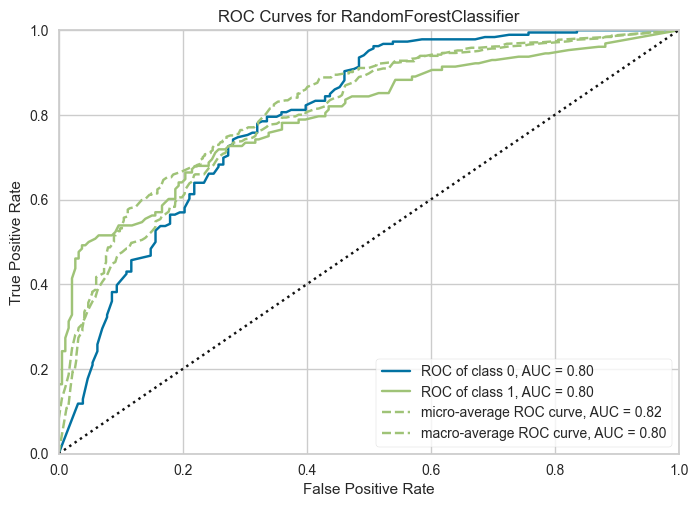

In [23]:
#plot the performance of the model
plot_model(best, plot = 'auc')


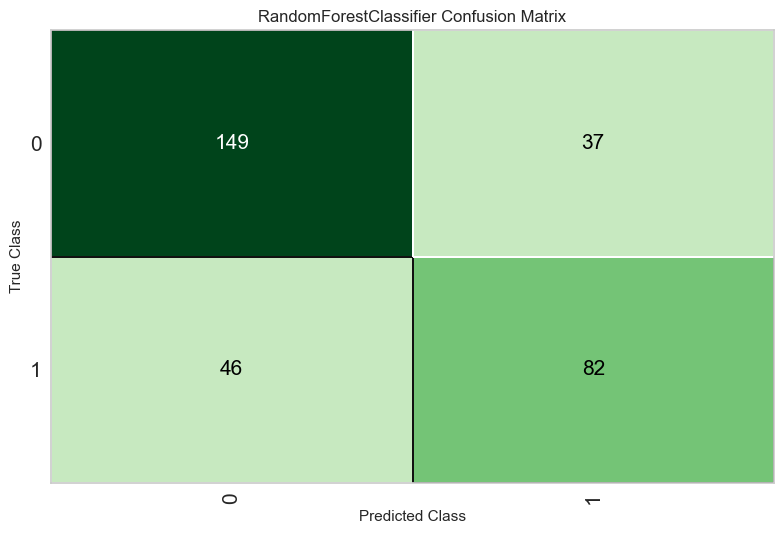

0    0.8
Name: Accuracy, dtype: float64


In [24]:
#plot the performance of the model using confusion matrix
plot_model(best, plot = 'confusion_matrix')
results = pull(best)
print(results['Accuracy'])



